In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2
from collections import defaultdict
from time import sleep




In [2]:
df = pd.read_csv("/content/data.csv")
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,yes,yes,yes,shell programming,cloud computing,no,yes,excellent,excellent,cloud computing,system developer,higherstudies,Web Services,no,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,yes,no,yes,machine learning,database security,no,no,poor,medium,networks,Business process analyst,job,SAaS services,yes,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,yes,no,yes,app development,web technologies,no,yes,poor,excellent,hacking,developer,higherstudies,Sales and Marketing,yes,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,no,yes,no,python,data science,yes,no,medium,excellent,networks,testing,higherstudies,Testing and Maintainance Services,no,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,no,no,no,app development,cloud computing,no,no,poor,excellent,Computer Architecture,testing,higherstudies,product development,no,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [ ]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

(20000, 39)

In [5]:
labels = df_new['Suggested Job Role'].unique()

In [4]:
#@title
df_new = df.replace(to_replace = ["Database Administrator", "Portal Administrator", 'Systems Security Administrator', 'Network Security Administrator'], value = "Adminstrator")
df_new = df_new.replace(to_replace = ["CRM Business Analyst", 'Business Intelligence Analyst', 'Information Security Analyst', 'Programmer Analyst', 'Systems Analyst'], value = "Analyst")
df_new = df_new.replace(to_replace = ['Database Developer','CRM Technical Developer','Mobile Applications Developer', 'Web Developer','Software Developer'], value = "Developer")
df_new = df_new.replace(to_replace = ["Design & UX",'Solutions Architect', 'Data Architect', 'UX Designer', 'Applications Developer'] , value = "Designer")
df_new = df_new.replace(to_replace = ['Project Manager','Information Technology Manager', "Business Systems Analyst", 'Database Manager', 'E-Commerce Analyst'], value = "Manager")
df_new = df_new.replace(to_replace = ["Network Security Engineer", 'Network Engineer', 'Software Engineer', 'Technical Engineer', "Software Systems Engineer"], value = "Engineer")
df_new = df_new.replace(to_replace = ['Quality Assurance Associate', 'Technical Support', 'Technical Services/Help Desk/Tech Support','Information Technology Auditor', 'Software Quality Assurance (QA) / Testing'], value = "Technical Support")


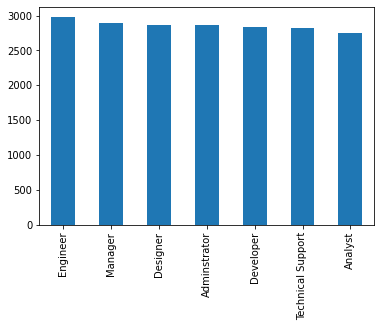

In [ ]:
#@title
df_new['Suggested Job Role'].value_counts().plot.bar()


In [ ]:
#@title
df.describe()

In [ ]:
#@title
df.info()

In [ ]:
#@title
df.hist(figsize=(20,10), grid = True, layout=(4, 4), bins = 30)

In [ ]:
#@title
df.select_dtypes(include=[np.object]).columns

In [ ]:
#@title
# check the missing points
missing = df.isnull().sum().sort_values(ascending = False)
percentageMissing = (missing/len(df))*100
pd.concat([missing, percentageMissing], axis = 1, keys= ['Number of missing values ', 'Percentage of Missing Values'])

In [ ]:
#@title
df.boxplot(figsize = (30, 10))

In [6]:
dct = defaultdict(LabelEncoder)
df_ = df_new.apply(lambda x: dct[x.name].fit_transform(x))
df_.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,9,3,18,27,34,34,27,24,1,5,3,0,3,7,1,1,1,8,0,0,1,0,0,4,4,0,8,0,0,21,1,0,1,0,0,0,1,0,3
1,18,2,13,0,11,10,13,24,31,8,6,1,1,2,1,0,1,5,2,0,0,2,1,7,0,1,4,1,1,5,1,1,0,1,0,0,0,1,0
2,11,26,31,27,1,21,12,12,34,7,0,4,0,2,1,0,1,0,7,0,1,2,0,6,2,0,5,1,1,29,0,0,1,0,1,0,0,1,0
3,16,27,0,24,29,13,2,28,9,3,0,1,1,4,0,1,0,6,1,1,0,1,0,7,5,0,7,0,0,23,0,1,0,0,1,1,1,1,0
4,32,2,30,7,11,29,13,11,13,0,4,4,5,2,0,0,0,0,0,0,0,2,0,0,5,0,9,0,1,7,1,0,1,0,1,0,1,1,5


In [7]:
y = df_['Suggested Job Role'].values
del df_["Suggested Job Role"]

In [ ]:
#@title
# Random Features For testing the performance
acc_ = []

for j in range(2, 10):  
    sleep(10)
    for i in range(10):
        X_r = df_.sample(n = j, axis='columns') 
        X_r_ = X_r.values.astype(np.float)
        x_train, x_test, y_train, y_test = train_test_split(X_r_, y, test_size = 0.3 , random_state = 42)
        clf = MLPClassifier(max_iter = 300)
        clf.fit(x_train, y_train)
        acc = clf.score(x_test, y_test)
        print("The accuracy of the model is:", acc, "The col is:", X_r.columns.values.tolist())
        acc_.append(acc)
        sleep(5)


y_axis = acc_
x_axis = list(range(len(acc_)))

plt.plot(x_axis, y_axis)
plt.show()

In [ ]:
#@title
# Feature Engineering
# Prediction All Columns
# 70 - 30
acc_ = 0
X_r_ = df_.values.astype(np.float)
x_train, x_test, y_train, y_test = train_test_split(X_r_, y, test_size = 0.3 , random_state = 42)
print(x_train.shape)

for i in range(10):
    clf = MLPClassifier(max_iter = 1000)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_ += acc

print("The average accuracy of the model is", acc_/10) 

In [ ]:
#@title
# Dropping columns from domain information
df_drop = df_.drop(columns=['hackathons', 
 'public speaking points',
 'certifications', 
 'workshops',
 'talenttests taken?',
 'Taken inputs from seniors or elders',
 'interested in games'])

acc_ = 0
X_ = df_drop.values.astype(np.float)
x_train, x_test, y_train, y_test = train_test_split(X_, y, test_size = 0.3 , random_state = 42)

for i in range(10):
    clf = MLPClassifier(max_iter = 1000)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_ += acc

print("The average accuracy of the model is", acc_/10 )

In [ ]:
#@title
# Dropping Columns from Random Predictions
df_drop = df_.drop(columns=['Percentage in Computer Architecture', 
 'Interested Type of Books',
 'memory capability score', 
 'Percentage in Communication skills',
 'workshops',
 'Percentage in Software Engineering',
 ])

print("The number of columns removed are 6")
print("The new number of columns are", df_drop.shape[1])

acc_ = 0
X_ = df_drop.values.astype(np.float)
x_train, x_test, y_train, y_test = train_test_split(X_, y, test_size = 0.3 , random_state = 42)

for i in range(10):
    clf = MLPClassifier(max_iter = 1000)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_ += acc

print("The average accuracy of the model is", acc_/10 )

In [ ]:
#@title
# Dropping columns from random predictions
df_drop = df_.drop(columns=['Percentage in Computer Architecture', 
 'Interested Type of Books',
 'memory capability score', 
 'Percentage in Communication skills',
 'workshops',
 'Percentage in Software Engineering',
 'worked in teams ever?', 
 'public speaking points',
 'certifications'
 ])

print("The number of columns removed are ", 38 - df_drop.shape[1])
print("The new number of columns are", df_drop.shape[1])

acc_ = []
X_ = df_drop.values.astype(np.float)
x_train, x_test, y_train, y_test = train_test_split(X_, y, test_size = 0.3 , random_state = 42)

for i in range(10):
    clf = MLPClassifier(max_iter = 1000)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#@title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

acc_ = []
X_ = df_.values.astype(np.float)
fs = SelectKBest(score_func=f_classif, k = 10)
X_selected = fs.fit_transform(X_, y)

print("The new number of columns are", X_selected.shape[1])

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3 , random_state = 42)

for i in range(5):
    sleep(5)
    clf = MLPClassifier(max_iter = 5000, hidden_layer_sizes=(40, 35, 30), activation="relu")
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#@title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

acc_ = []
X_ = df_.values.astype(np.float)
fs = SelectKBest(score_func=f_classif, k = 15)
X_selected = fs.fit_transform(X_, y)

print("The new number of columns are", X_selected.shape[1])

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3 , random_state = 42)

for i in range(10):
    sleep(5)
    clf = MLPClassifier(max_iter = 5000, hidden_layer_sizes=(40), activation="relu")
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#@title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

acc_ = []
X_ = df_.values.astype(np.float)
fs = SelectKBest(score_func=f_classif, k = 20)
X_selected = fs.fit_transform(X_, y)

print("The new number of columns are", X_selected.shape[1])

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3 , random_state = 42)

for i in range(10):
    sleep(5)
    clf = MLPClassifier(max_iter = 2000, hidden_layer_sizes=(40), activation="relu")
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    sleep(5)
    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#@title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

acc_ = []
X_ = df_.values.astype(np.float)
fs = SelectKBest(score_func=f_classif, k = 30)
X_selected = fs.fit_transform(X_, y)

print("The new number of columns are", X_selected.shape[1])

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3 , random_state = 42)

for i in range(10):
    sleep(5)
    clf = MLPClassifier(max_iter = 5000, hidden_layer_sizes=(40), activation="relu")
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#@title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

acc_ = []
X_ = df_.values.astype(np.float)
fs = SelectKBest(score_func=chi2, k = 10)
X_selected = fs.fit_transform(X_, y)

print("The new number of columns are", X_selected.shape[1])

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3 , random_state = 42)

for i in range(10):
    sleep(5)
    clf = MLPClassifier(max_iter = 5000, hidden_layer_sizes=(40), activation="relu")
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#@title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

acc_ = []
X_ = df_.values.astype(np.float)
fs = SelectKBest(score_func=chi2, k = 15)
X_selected = fs.fit_transform(X_, y)

print("The new number of columns are", X_selected.shape[1])

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3 , random_state = 42)

for i in range(10):
    sleep(5)
    clf = MLPClassifier(max_iter = 5000, hidden_layer_sizes=(40), activation="relu")
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#@title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

acc_ = []
X_ = df_.values.astype(np.float)
fs = SelectKBest(score_func=chi2, k = 20)
X_selected = fs.fit_transform(X_, y)

print("The new number of columns are", X_selected.shape[1])

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3 , random_state = 42)

for i in range(10):
    sleep(5)
    clf = MLPClassifier(max_iter = 5000, hidden_layer_sizes=(40), activation="relu")
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#@title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

acc_ = []
X_ = df_.values.astype(np.float)
fs = SelectKBest(score_func=mutual_info_classif, k = 10)
X_selected = fs.fit_transform(X_, y)

print("The new number of columns are", X_selected.shape[1])

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3 , random_state = 42)

for i in range(10):
    sleep(5)
    clf = MLPClassifier(max_iter = 5000, hidden_layer_sizes=(40), activation="relu")
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#@title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

acc_ = []
X_ = df_.values.astype(np.float)
fs = SelectKBest(score_func=mutual_info_classif, k = 15)
X_selected = fs.fit_transform(X_, y)

print("The new number of columns are", X_selected.shape[1])

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3 , random_state = 42)

for i in range(10):
    sleep(5)
    clf = MLPClassifier(max_iter = 5000, hidden_layer_sizes=(40), activation="relu")
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#@title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

acc_ = []
X_ = df_.values.astype(np.float)
fs = SelectKBest(score_func=mutual_info_classif, k = 20)
X_selected = fs.fit_transform(X_, y)

print("The new number of columns are", X_selected.shape[1])

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3 , random_state = 42)

for i in range(10):
    sleep(5)
    clf = MLPClassifier(max_iter = 5000, hidden_layer_sizes=(40), activation="relu")
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#@title
# Prediction Few Columns Removed
df_drop = df_.drop(columns=['Percentage in Computer Architecture', 
 'Interested Type of Books',
 'memory capability score', 
 'Percentage in Communication skills',
 'workshops',
 'Percentage in Software Engineering',
 'worked in teams ever?', 
 'public speaking points',
 'certifications'
 ])

print("The number of columns removed are ", 38 - df_drop.shape[1])
print("The new number of columns are", df_drop.shape[1])

acc_ = []
X_ = df_drop.values.astype(np.float)
x_train, x_test, y_train, y_test = train_test_split(X_, y, test_size = 0.3 , random_state = 42)

for i in range(10):
    sleep(5)
    clf = MLPClassifier(max_iter = 5000, hidden_layer_sizes=(40), activation="relu")
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)
    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()

FE- End

In [12]:
#@title
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(7, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    # plt.figure(figsize=(10, 10), dpi=80)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
#@title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

acc_ = []

X_ = df_.values.astype(np.float64)

min_max_scaler = MinMaxScaler()
X_selected = min_max_scaler.fit_transform(X_)

fs = SelectKBest(score_func = chi2, k = 15)
X_selected = fs.fit_transform(X_selected, y)

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.30)


for i in range(10):
    sleep(5)
    clf = MLPClassifier()
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)

    y_pred = clf.predict(x_test)
    y_pred_ = dct["Suggested Job Role"].inverse_transform(y_pred)
    y_test_ = dct["Suggested Job Role"].inverse_transform(y_test)
    
    cm = confusion_matrix(y_pred_, y_test_, labels = labels)
    plot_confusion_matrix(cm, labels)

    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
#@title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

acc_ = []

X_ = df_.values.astype(np.float64)

min_max_scaler = MinMaxScaler()
X_selected = min_max_scaler.fit_transform(X_)

fs = SelectKBest(score_func = chi2, k = 15)
X_selected = fs.fit_transform(X_selected, y)

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.30)


for i in range(10):
    sleep(5)
    clf = MLPClassifier(max_iter=1000)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)

    y_pred = clf.predict(x_test)
    y_pred_ = dct["Suggested Job Role"].inverse_transform(y_pred)
    y_test_ = dct["Suggested Job Role"].inverse_transform(y_test)
    
    cm = confusion_matrix(y_pred_, y_test_, labels = labels)
    plot_confusion_matrix(cm, labels)

    class_wise = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_wise = class_wise.diagonal()
    print("The class wise accuracies are", class_wise)


    acc_.append(acc)

print("The average accuracy of the model is", np.mean(acc_))

plt.plot(list(range(len(acc_))), acc_,  label="Accuracy")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()



In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

X_ = df_.values.astype(np.float64)

min_max_scaler = MinMaxScaler()
X_selected = min_max_scaler.fit_transform(X_)

fs = SelectKBest(score_func = chi2, k = 15)
X_selected = fs.fit_transform(X_selected, y)
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.30)


In [ ]:
#@title
# Multiple Train Test Split
splits = [0.40, 0.33, 0.30, 0.25, 0.20, 0.15, 0.10]
acc_ = []

for i in splits:
    sleep(5)
    x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = i)

    clf = MLPClassifier(max_iter=1000)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)

    y_pred = clf.predict(x_test)
    y_pred_ = dct["Suggested Job Role"].inverse_transform(y_pred)
    y_test_ = dct["Suggested Job Role"].inverse_transform(y_test)
    
    cm = confusion_matrix(y_pred_, y_test_, labels = labels)
    plot_confusion_matrix(cm, labels)

    class_wise = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_wise = class_wise.diagonal()
    print("The class wise accuracies are", class_wise)

    acc_.append(acc)

plt.plot(splits, acc_,  label="Split-wise Accuracy")
plt.legend(loc = "upper left")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
#@title
# Multiple Activation Functions
funcs = ['logistic', 'relu', 'identity', 'tanh']
acc_ = []

for i in funcs:
    sleep(5)
    
    clf = MLPClassifier(max_iter=1000, activation=i, random_state = 42)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)

    y_pred = clf.predict(x_test)
    y_pred_ = dct["Suggested Job Role"].inverse_transform(y_pred)
    y_test_ = dct["Suggested Job Role"].inverse_transform(y_test)
    
    cm = confusion_matrix(y_pred_, y_test_, labels = labels)
    plot_confusion_matrix(cm, labels)

    class_wise = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_wise = class_wise.diagonal()
    print("The class wise accuracies are", class_wise)

    acc_.append(acc)

plt.plot(funcs, acc_,  label="Activation Function wise Accuracy")
plt.legend(loc = "upper left")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
#@title
# Multiple Optimizers
solvers = ['lbfgs', 'sgd', 'adam']
acc_ = []

for i in solvers:
    sleep(5)
    
    clf = MLPClassifier(max_iter=1000, activation="tanh", random_state = 42, solver=i)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)

    y_pred = clf.predict(x_test)
    y_pred_ = dct["Suggested Job Role"].inverse_transform(y_pred)
    y_test_ = dct["Suggested Job Role"].inverse_transform(y_test)
    
    cm = confusion_matrix(y_pred_, y_test_, labels = labels)
    plot_confusion_matrix(cm, labels)

    class_wise = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_wise = class_wise.diagonal()
    print("The class wise accuracies are", class_wise)

    acc_.append(acc)

plt.plot(solvers, acc_,  label="Activation Function wise Accuracy")
plt.legend(loc = "upper left")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
#@title
# Multiple Optimizers
learning_rates = ['constant', 'invscaling', 'adaptive']
acc_ = []

for i in learning_rates:
    sleep(5)
    
    clf = MLPClassifier(max_iter=1000, activation="tanh", random_state = 42, solver='sgd', learning_rate=i)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)

    y_pred = clf.predict(x_test)
    y_pred_ = dct["Suggested Job Role"].inverse_transform(y_pred)
    y_test_ = dct["Suggested Job Role"].inverse_transform(y_test)
    
    cm = confusion_matrix(y_pred_, y_test_, labels = labels)
    plot_confusion_matrix(cm, labels)

    class_wise = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_wise = class_wise.diagonal()
    print("The class wise accuracies are", class_wise)

    acc_.append(acc)

plt.plot(learning_rates, acc_,  label="Learning Rate wise Accuracy")
plt.legend(loc = "upper left")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
#@title
# Learning Rates Init
learning_rate_inits = [0.0001, 0.0002, 0.001, 0.002, 0.01, 0.02, 0.1, 0.2, 0.5, 1]

acc_ = []

for i in learning_rate_inits:
    sleep(5)
    
    clf = MLPClassifier(max_iter=1000, activation="tanh", random_state = 42, solver='sgd', learning_rate='adaptive', learning_rate_init=i)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)

    y_pred = clf.predict(x_test)
    y_pred_ = dct["Suggested Job Role"].inverse_transform(y_pred)
    y_test_ = dct["Suggested Job Role"].inverse_transform(y_test)
    
    cm = confusion_matrix(y_pred_, y_test_, labels = labels)
    plot_confusion_matrix(cm, labels)

    class_wise = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_wise = class_wise.diagonal()
    print("The class wise accuracies are", class_wise)

    acc_.append(acc)

plt.plot(learning_rate_inits, acc_,  label="Learning Rate wise Accuracy")
plt.legend(loc = "upper left")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
#@title
# Momentum
momentums = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9]

acc_ = []

for i in momentums:
    sleep(5)
    
    clf = MLPClassifier(max_iter=1000, activation="tanh", random_state = 42, solver='sgd', learning_rate='adaptive', learning_rate_init=0.001, momentum=i)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)

    y_pred = clf.predict(x_test)
    y_pred_ = dct["Suggested Job Role"].inverse_transform(y_pred)
    y_test_ = dct["Suggested Job Role"].inverse_transform(y_test)
    
    cm = confusion_matrix(y_pred_, y_test_, labels = labels)
    plot_confusion_matrix(cm, labels)

    class_wise = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_wise = class_wise.diagonal()
    print("The class wise accuracies are", class_wise)

    acc_.append(acc)

plt.plot(momentums, acc_,  label="momentum wise Accuracy")
plt.legend(loc = "upper left")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
#@title
# Momentum
sizes = [10, 20, 30, 40, 50, 80, 100, 150, 200, 500, 1000]

acc_ = []

for i in sizes:
    sleep(5)
    
    clf = MLPClassifier(hidden_layer_sizes=(i) ,max_iter=1000, activation="tanh", random_state = 42, solver='sgd', learning_rate='adaptive', learning_rate_init=0.001, momentum=0.8)
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_test)
    y_pred_ = dct["Suggested Job Role"].inverse_transform(y_pred)
    y_test_ = dct["Suggested Job Role"].inverse_transform(y_test)
    
    cm = confusion_matrix(y_pred_, y_test_, labels = labels)
    plot_confusion_matrix(cm, labels)

    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)

    class_wise = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_wise = class_wise.diagonal()
    print("The class wise accuracies are", class_wise)

    acc_.append(acc)

plt.plot(sizes, acc_,  label="hidden layer size wise Accuracy")
plt.legend(loc = "upper left")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
#@title
# Hidden Layers Permutation
sizes = [(150, 100), (150, 150), (150, 50), (150, 30), (150, 10), (150, 75, 36), (150, 100, 50, 30), (150, 100, 70, 30), (150, 100, 50, 20), (150, 100, 50, 15, 10)]

acc_ = []

for i in sizes:
    sleep(5)
    
    clf = MLPClassifier(hidden_layer_sizes=i ,max_iter=1000, activation="tanh", random_state = 42, solver='sgd', learning_rate='adaptive', learning_rate_init=0.001, momentum=0.8)
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_test)
    y_pred_ = dct["Suggested Job Role"].inverse_transform(y_pred)
    y_test_ = dct["Suggested Job Role"].inverse_transform(y_test)
    
    cm = confusion_matrix(y_pred_, y_test_, labels = labels)
    plot_confusion_matrix(cm, labels)

    acc = clf.score(x_test, y_test)
    print("The accuracy of the model is:", acc)

    class_wise = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_wise = class_wise.diagonal()
    print("The class wise accuracies are", class_wise)

    acc_.append(acc)

plt.rcParams["figure.figsize"] = (20,5)
plt.plot(list(map(str, sizes)), acc_,  label="hidden layer size wise Accuracy")
plt.legend(loc = "upper left")
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.show()



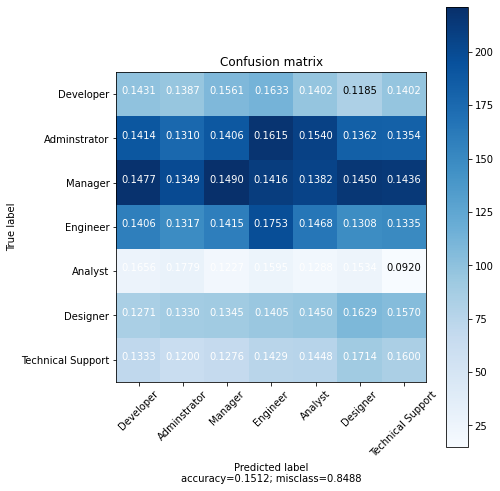

The accuracy of the model is: 0.15116666666666667
The class wise accuracies are [0.14306358 0.13095238 0.14902225 0.1752669  0.12883436 0.16292975
 0.16      ]


In [34]:
clf = MLPClassifier(hidden_layer_sizes=(150, 100, 50, 20) ,max_iter=1000, activation="tanh", random_state = 42, solver='sgd', learning_rate='adaptive', learning_rate_init=0.001, momentum=0.8)
clf.fit(x_train, y_train)
    
y_pred = clf.predict(x_test)
y_pred_ = dct["Suggested Job Role"].inverse_transform(y_pred)
y_test_ = dct["Suggested Job Role"].inverse_transform(y_test)
    
cm = confusion_matrix(y_pred_, y_test_, labels = labels)
plot_confusion_matrix(cm, labels)

acc = clf.score(x_test, y_test)
print("The accuracy of the model is:", acc)

class_wise = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise = class_wise.diagonal()
print("The class wise accuracies are", class_wise)
